<a href="https://colab.research.google.com/github/Abhay17K/Deep-learning/blob/master/Revision_class_05_optimization_BGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient descent optimization
##1) Batch GD
##2) Stochastic GD
##3) Mini Batch GD

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Revision_DL_dec2024/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
 x = df.iloc[:, :-1]
 y= df.iloc[:,-1]

In [ ]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
y.shape

(400,)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# creating simple architecture with batch normalization and dropout
model = Sequential()
model.add(Dense(10, activation = "relu", input_dim = 2))

model.add(Dense(10, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
df.shape

(400, 3)

In [ ]:
import time
start = time.time()
history = model.fit(x_scaled, y, epochs=50, validation_split= 0.2, batch_size = 320 )
end = time.time()
print(end-start)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4875 - loss: 0.7199 - val_accuracy: 0.3625 - val_loss: 0.8008
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5125 - loss: 0.7183 - val_accuracy: 0.3625 - val_loss: 0.7993
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5344 - loss: 0.7168 - val_accuracy: 0.3625 - val_loss: 0.7978
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5813 - loss: 0.7152 - val_accuracy: 0.3625 - val_loss: 0.7964
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5969 - loss: 0.7137 - val_accuracy: 0.3625 - val_loss: 0.7951
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6094 - loss: 0.7122 - val_accuracy: 0.3625 - val_loss: 0.7939
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6094 - loss: 0.7107 - val_accuracy: 0.3625 - val_loss: 0.7927
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6125 - loss: 0.7092 - val_accuracy: 0.3625 - val_loss: 0.7916


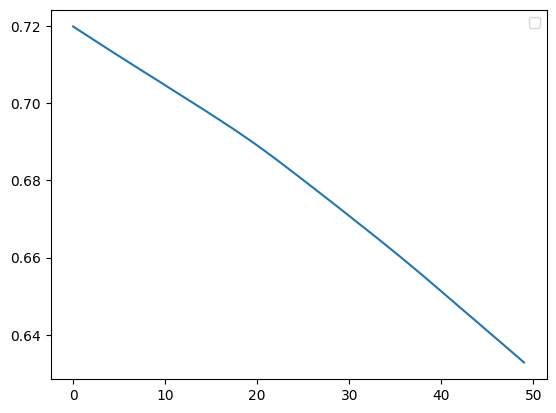

In [ ]:
plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

In [ ]:
import time
start = time.time()
history1 = model.fit(x_scaled, y, epochs=50, validation_split= 0.2, batch_size = 32 )
end = time.time()
print(end-start)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7206 - loss: 0.6216 - val_accuracy: 0.3625 - val_loss: 0.7799
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7182 - loss: 0.6026 - val_accuracy: 0.3625 - val_loss: 0.7783
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 0.5880 - val_accuracy: 0.3625 - val_loss: 0.7717
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7198 - loss: 0.5706 - val_accuracy: 0.3625 - val_loss: 0.7668
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7425 - loss: 0.5407 - val_accuracy: 0.3625 - val_loss: 0.7606
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7192 - loss: 0.5257 - val_accuracy: 0.3625 - val_loss: 0.7537
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7084 - loss: 0.5262 - val_accuracy: 0.3625 - val_loss: 0.7432
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7404 - loss: 0.4800 - val_accuracy: 0.3625 - val_loss

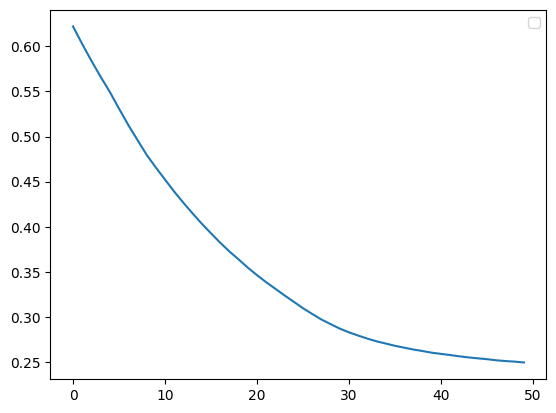

In [ ]:
plt.plot(history1.history["loss"])
# plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

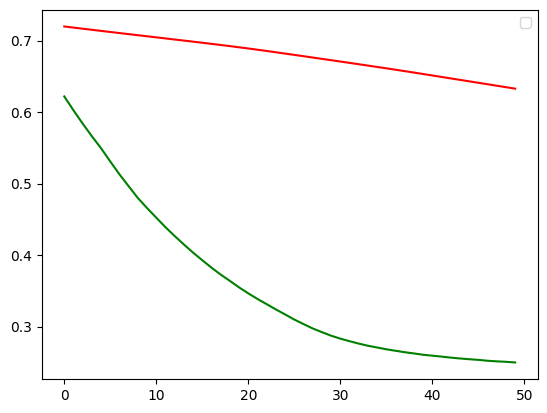

In [ ]:
plt.plot(history.history["loss"], color = "red")
plt.plot(history1.history["loss"] ,color ="green")
plt.legend()
plt.show()

In [ ]:
import time
start = time.time()
history2 = model.fit(x_scaled, y, epochs=50, validation_split= 0.2, batch_size = 1 )
end = time.time()
print(end-start)

Epoch 1/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8838 - loss: 0.2584 - val_accuracy: 0.9750 - val_loss: 0.2808
Epoch 2/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9034 - loss: 0.2502 - val_accuracy: 0.9750 - val_loss: 0.2763
Epoch 3/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9010 - loss: 0.2416 - val_accuracy: 0.9750 - val_loss: 0.2654
Epoch 4/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.3076 - val_accuracy: 0.9750 - val_loss: 0.2567
Epoch 5/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8960 - loss: 0.2368 - val_accuracy: 0.9750 - val_loss: 0.2538
Epoch 6/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9152 - loss: 0.2118 - val_accuracy: 0.9875 - val_loss: 0.2513
Epoch 7/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9056 - loss: 0.2144 - val_accuracy: 0.9750 - val_loss: 0.2622
Epoch 8/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8972 - loss: 0.2382 - val_accuracy: 0.

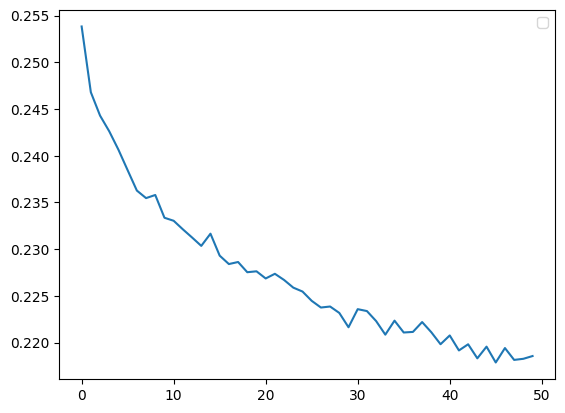

In [ ]:
plt.plot(history2.history["loss"])
plt.legend()
plt.show()

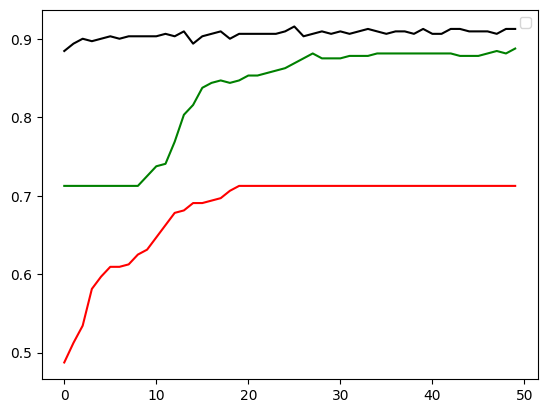

In [ ]:
#Accuracy
plt.plot(history.history["accuracy"], color = "red")
plt.plot(history1.history["accuracy"] ,color ="green")
plt.plot(history2.history["accuracy"] ,color ="black")
plt.legend()
plt.show()

In [ ]:
# val_accuracy

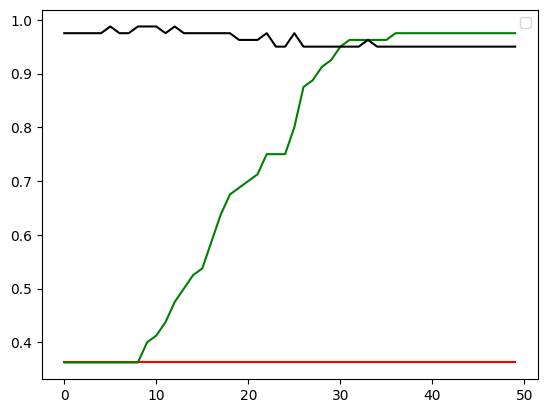

In [ ]:
plt.plot(history.history["val_accuracy"], color = "red")
plt.plot(history1.history["val_accuracy"] ,color ="green")
plt.plot(history2.history["val_accuracy"] ,color ="black")
plt.legend()
plt.show()

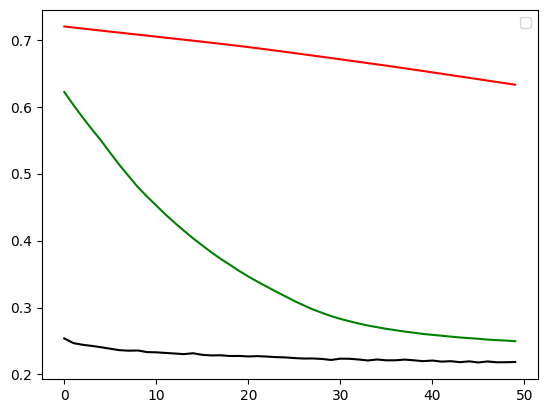

In [ ]:
plt.plot(history.history["loss"], color = "red")
plt.plot(history1.history["loss"] ,color ="green")
plt.plot(history2.history["loss"] ,color ="black")
plt.legend()
plt.show()

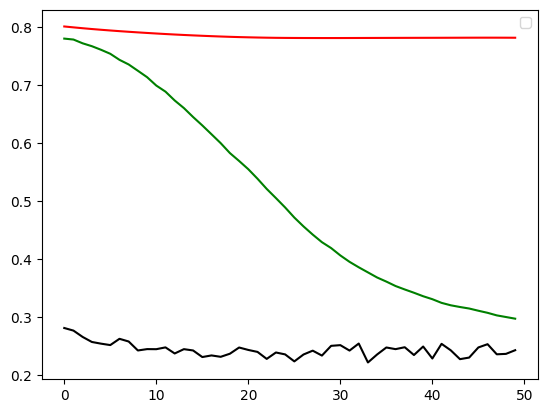

In [ ]:
plt.plot(history.history["val_loss"], color = "red")
plt.plot(history1.history["val_loss"] ,color ="green")
plt.plot(history2.history["val_loss"] ,color ="black")
plt.legend()
plt.show()

# Exponentially weighted moving average

In [ ]:
delhi = pd.read_csv("/content/DailyDelhiClimateTest.csv")
delhi.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
delhi = delhi.iloc[:,:2]
delhi.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


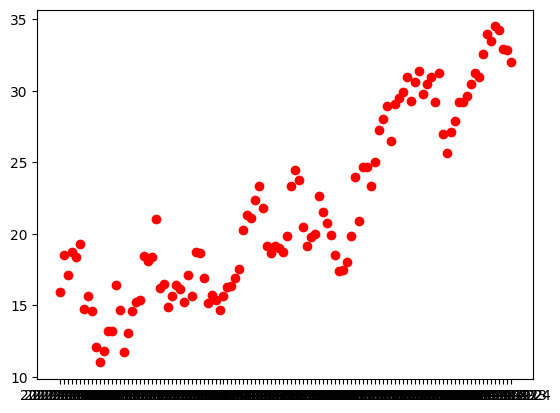

In [ ]:
plt.scatter(x= delhi['date'], y=delhi['meantemp'], color = 'red')
plt.show()

In [ ]:
x1 = delhi['meantemp'].ewm(alpha=0.9).mean()
x1

,meantemp
0,15.913043
1,18.264822
2,17.225443
3,18.552677
4,18.405266
...,...
109,34.403401
110,34.265340
111,33.036534
112,32.891153


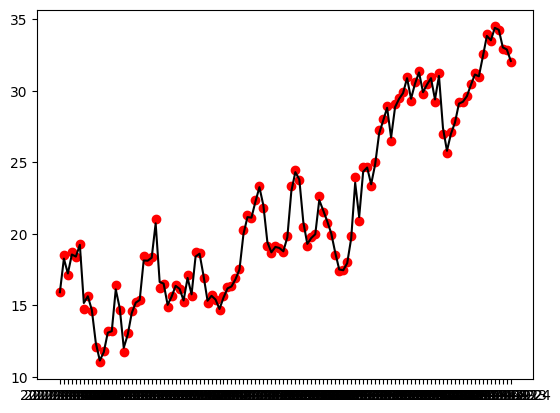

In [ ]:
plt.scatter(delhi['date'], delhi['meantemp'], color = 'red')
plt.plot(delhi['date'],x1,color = 'black', label = "alpha = 0.9")
plt.show()


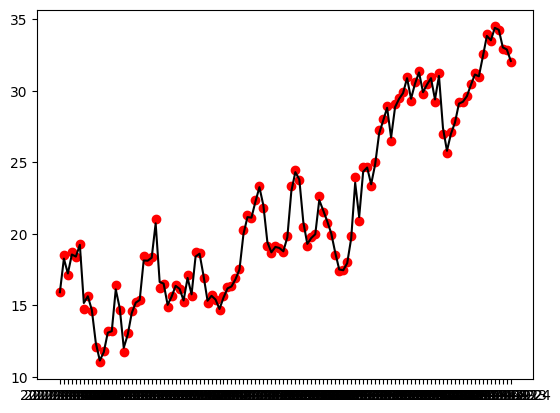

In [ ]:
plt.scatter(delhi['date'], delhi['meantemp'], color = 'red')
plt.plot(delhi['date'],x1,color = 'black', label = "alpha = 0.")
plt.show()

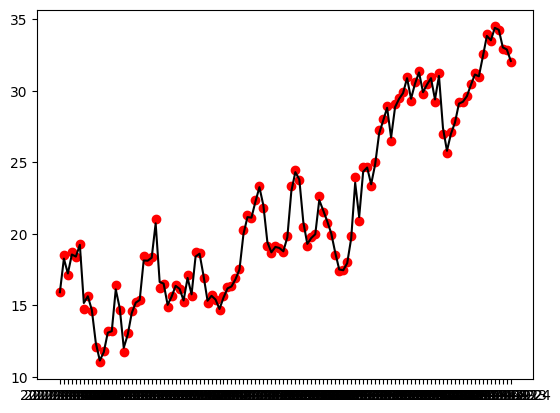

In [ ]:
plt.scatter(delhi['date'], delhi['meantemp'], color = 'red')
plt.plot(delhi['date'],x1,color = 'black', label = "alpha = 0.2")
plt.show()